$$ Question \quad 1$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
data_types = ['Text/Language', 'Image', 'Video', 'Time-series', 'Scientific/Sensor']
max_sizes = [1e2, 1e4, 1e5, 1e3, 1e8]  # in GB
log_max_sizes = np.log10(max_sizes)

Text(0.5, 1.0, 'Size of Scientific Dataset')

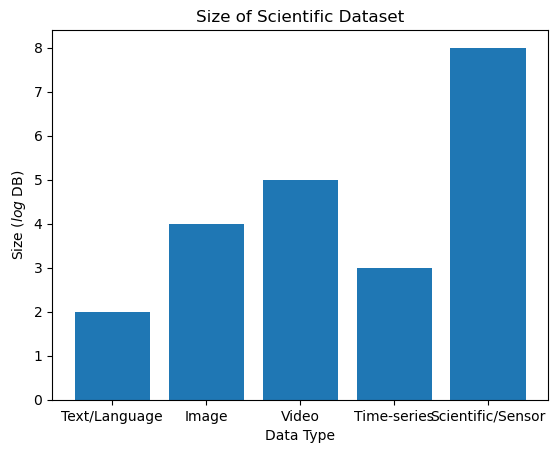

In [ ]:
plt.bar(data_types, log_max_sizes,width=0.8, align='center')
plt.xlabel("Data Type")
plt.ylabel("Size ($log$ DB)")
plt.title("Size of Scientific Dataset")

$$ Question \quad 2$$

In [ ]:
def generate_data(n_samples, noise=0.1, ):
    X = np.linspace(0, 1, n_samples).reshape(-1, 1)
    y = np.sin(2 * np.pi * X) + np.random.normal(0, noise, X.shape) #Sin function is a bad example, as the optimum point will be quite far away from the degree of integral
    return X, y

In [ ]:
def fit_polynomial(X, y, degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    return model, poly_features

In [ ]:
def run_experiment(max_degree=15, max_samples=300, step=10):
    results = []
    for n_samples in range(step, max_samples + 1, step):
        X, y = generate_data(n_samples)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        for degree in range(1, max_degree + 1):
            model, poly_features = fit_polynomial(X_train, y_train, degree)
        # Calculate train error
            X_train_poly = poly_features.transform(X_train)
            y_train_pred = model.predict(X_train_poly)
            train_mse = mean_squared_error(y_train, y_train_pred)
            
            # Calculate test error
            X_test_poly = poly_features.transform(X_test)
            y_test_pred = model.predict(X_test_poly)
            test_mse = mean_squared_error(y_test, y_test_pred)
            
            results.append((n_samples, degree, train_mse, test_mse))
    return np.array(results)

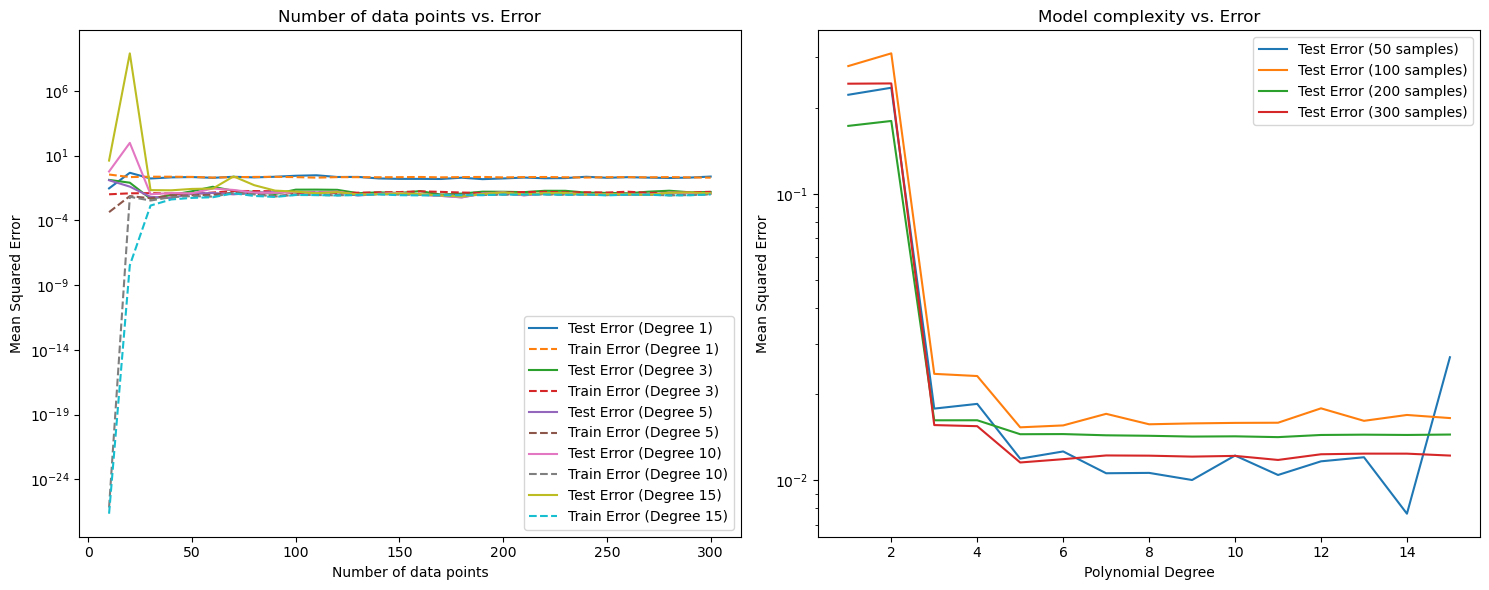

In [ ]:
# Run experiment
results = run_experiment()

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

for degree in [1, 3, 5, 10, 15]:
    mask = results[:, 1] == degree
    ax1.plot(results[mask, 0], results[mask, 3], label=f'Test Error (Degree {degree})')
    ax1.plot(results[mask, 0], results[mask, 2], label=f'Train Error (Degree {degree})', linestyle='--')

ax1.set_xlabel('Number of data points')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('Number of data points vs. Error')
ax1.legend()
ax1.set_yscale('log')

for n_samples in [50, 100, 200, 300]:
    mask = results[:, 0] == n_samples
    ax2.plot(results[mask, 1], results[mask, 3], label=f'Test Error ({n_samples} samples)')


ax2.set_xlabel('Polynomial Degree')
ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Model complexity vs. Error')
ax2.legend()
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

$$ Question \quad 3$$

In [ ]:
from matplotlib.colors import LogNorm

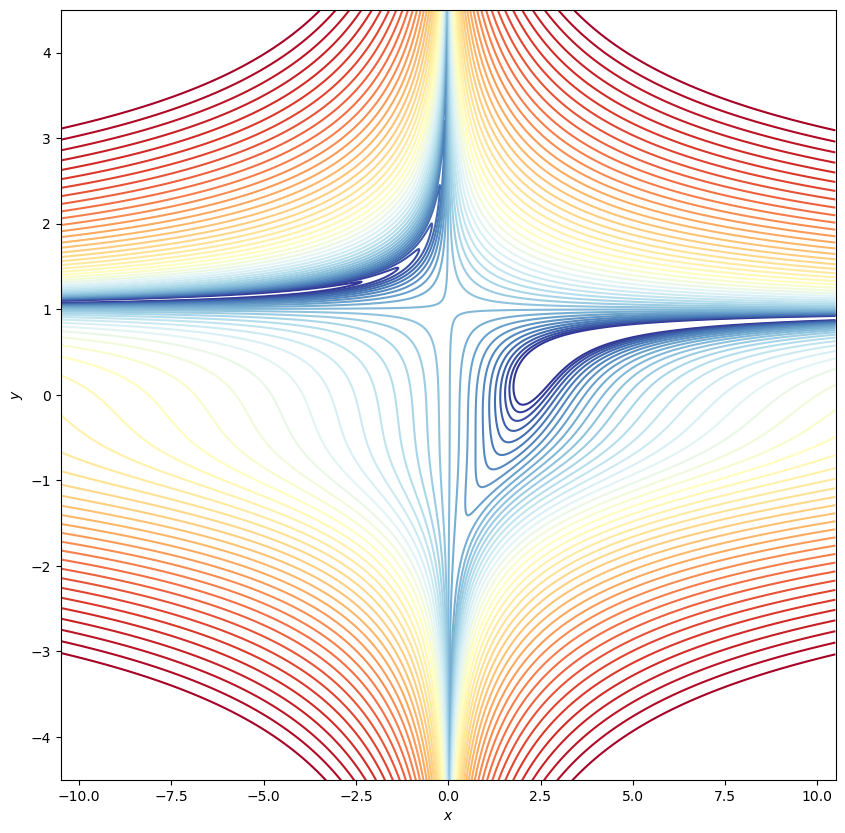

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def function(x, y):
    f = np.square(1.5 - x + x*y) + np.square(2.25 - x + x*np.square(y)) + np.square(2.625 - x + x*y**3)
    return f

def grad(params):
    x = params[0]
    y = params[1]
    grad_x = 2*(1.5 - x + x*y)*(-1 + y) + 2*(2.25 - x + x*y**2)*(-1 + y**2) + 2*(2.625 - x + x*y**3)*(-1 + y**3)
    grad_y = 2*(1.5 - x + x*y)*x + 2*(2.25 - x + x*y**2)*2*x*y + 2*(2.625 - x + x*y**3)*3*x*y**2
    return np.array([grad_x, grad_y])

def contour_function():
    # plot function
    x, y = np.meshgrid(np.arange(-10.5, 10.5, 0.01), np.arange(-10.5, 4.5, 0.01))
    fig, ax = plt.subplots(figsize=(10, 10))
    z = function(x, y)
    ax.contour(x, y, z, levels=np.logspace(0, 5, 45), norm=LogNorm(), cmap="RdYlBu_r")


    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-10.5, 10.5))
    ax.set_ylim((-4.5, 4.5))
    
    return fig, ax

# Contour plot of Beale's Function
fig4, ax4 = contour_function()
plt.show()

In [ ]:
def adam(grad, init, n_epochs, lr=0.001, beta1=0.9, beta2=0.99, epsilon=1e-8):
    params = np.array(init)
    param_traj = np.zeros([n_epochs+1, 2])
    param_traj[0,] = init
    m = np.zeros_like(params)
    v = np.zeros_like(params)
    
    for t in range(1, n_epochs+1):
        g = grad(params)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * np.square(g)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        params = params - lr * m_hat / (np.sqrt(v_hat) + epsilon)
        param_traj[t,] = params
    
    return param_traj

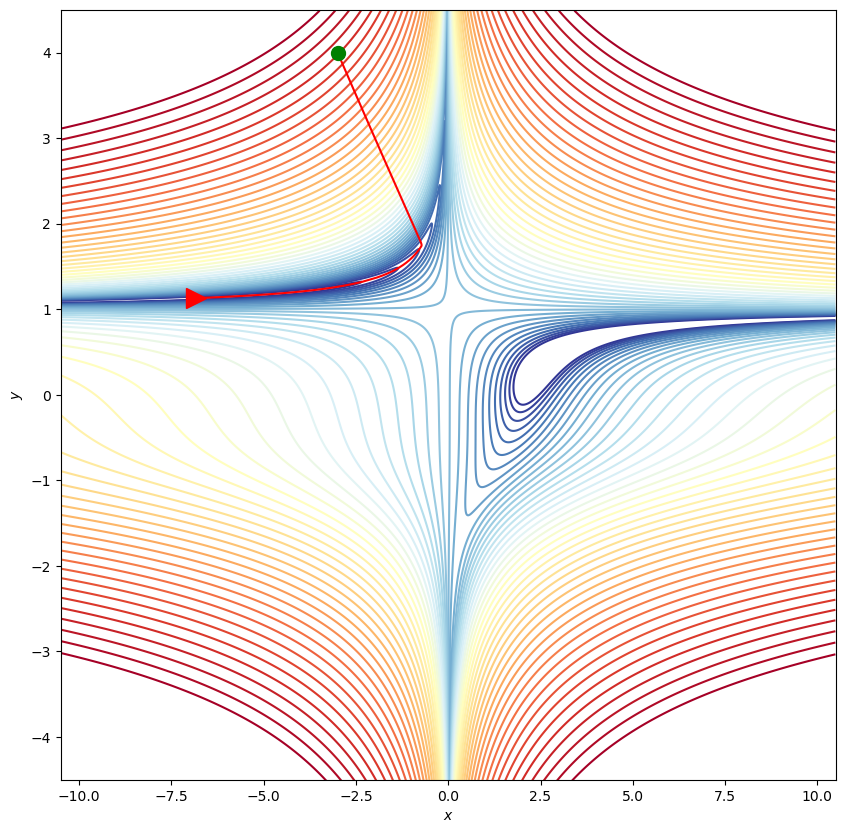

In [ ]:
def overlay_trajectory_contour(ax,trajectory,color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys,color)
    ax.plot(xs[-1],ys[-1],color+">",markersize=14)
    return ax

n_epochs = 10000
lr = 1e-3
init = (-3,4)

fig, ax = contour_function()

adam_trajectory = adam(grad, init, n_epochs, lr=lr)
overlay_trajectory_contour(ax, adam_trajectory, color='r')
ax.plot(init[0], init[1], 'go', markersize=10)

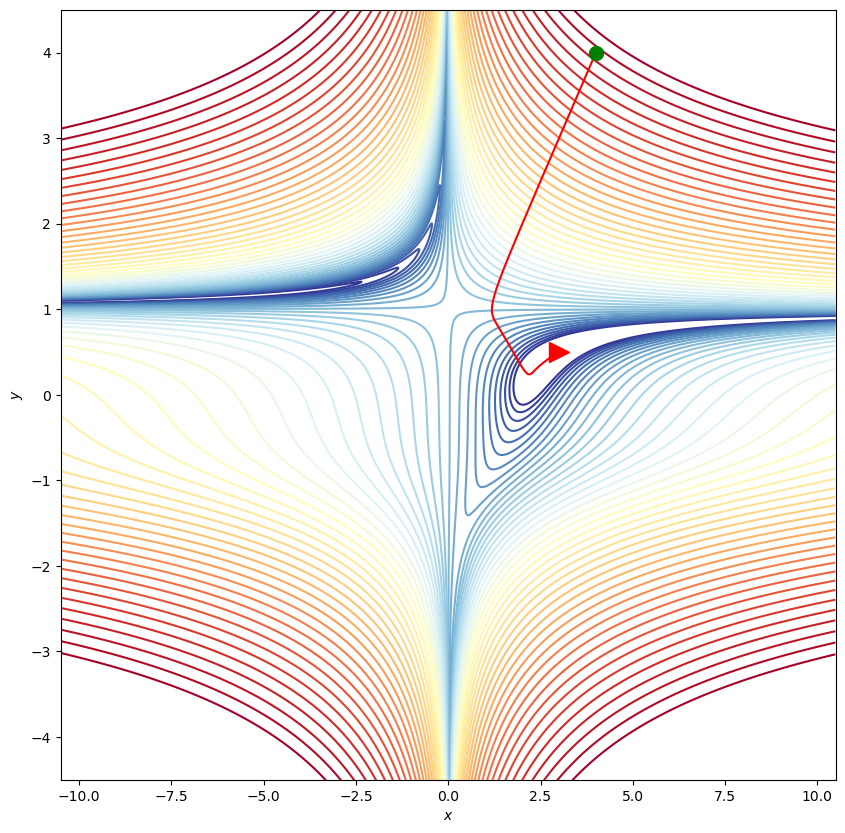

In [ ]:
n_epochs = 10000
lr = 1e-3
init = (4,4)

fig, ax = contour_function()

adam_trajectory = adam(grad, init, n_epochs, lr=lr)
overlay_trajectory_contour(ax, adam_trajectory, color='r')
ax.plot(init[0], init[1], 'go', markersize=10)

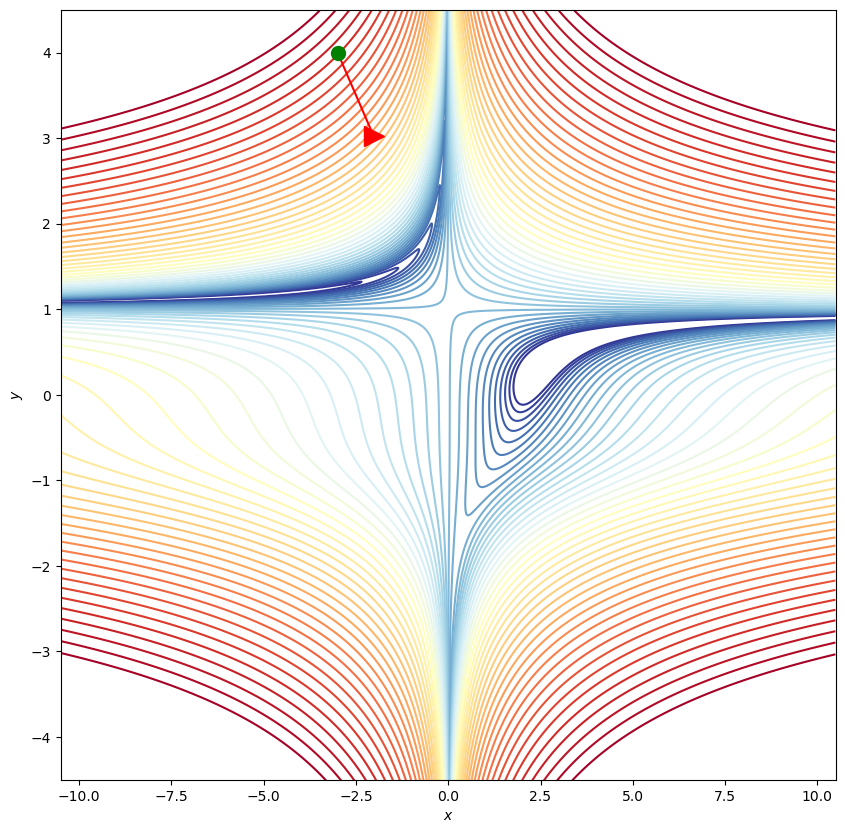

In [ ]:
n_epochs = 10000
lr = 1e-4
init = (-3,4)

fig, ax = contour_function()

adam_trajectory = adam(grad, init, n_epochs, lr=lr)
overlay_trajectory_contour(ax, adam_trajectory, color='r')
ax.plot(init[0], init[1], 'go', markersize=10)

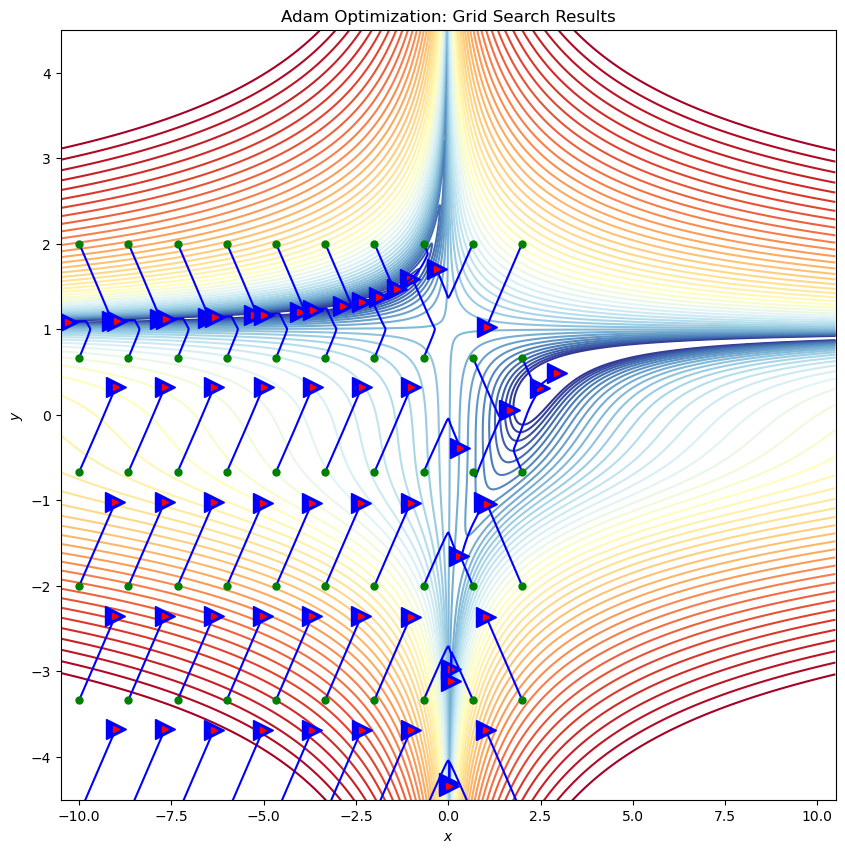

In [ ]:
# Grid search
x_range = np.linspace(-10, 2,10)
y_range = np.linspace(-10, 2,10)
grid_points = [(x, y) for x in x_range for y in y_range]

fig, ax = contour_function()

for point in grid_points:
    adam_trajectory = adam(grad, point, n_epochs, lr=lr)
    overlay_trajectory_contour(ax, adam_trajectory, color='b')
    ax.plot(point[0], point[1], 'go', markersize=5)  # Starting point
    ax.plot(adam_trajectory[-1, 0], adam_trajectory[-1, 1], 'r>', markersize=5)  # Endpoint

plt.title("Adam Optimization: Grid Search Results")
plt.show()